# Muertes y Contaminación en México 2019-2022

<a target="_blank" href="https://colab.research.google.com/github/SalRmz/DCDP/blob/317e6505584e317bd5cfb1192509e6148cffc2fc/01%20Programaci%C3%B3n%20en%20Python/notebooks/proyecto01/death_and_pollution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Equipo 6
- Javier De La Rosa Mondragón
- Julio Pinzón
- Salomón Rmz

### Datasets disponibles en:
https://drive.google.com/drive/folders/1ha2rOZAKgukpHgsFbBi2vnnuWlItuc_S?usp=sharing

![Contaminación](./contaminacion-monterrey-696x392.jpg)




In [1]:
# importamos las bibliotecas requeridas
import pandas as pd
import datetime

# visualización:
import matplotlib.pyplot as plt
import seaborn as sns

Analizaremos las 5 entidades con más muertes por enfermedades de vias respiratorias
y compararemos sus números de muertes con los niveles de contaminación

# Dataset de muertes en México
## fuentes:
- http://www.dgis.salud.gob.mx/contenidos/basesdedatos/da_defunciones_gobmx.html
- https://www.kaggle.com/datasets/tavoglc/mortality-in-mexico    

TODO: agregar una descripción

In [2]:
## Lectura de datos de muertes en mexico
muertesDf = pd.read_csv("./data/deaths_mexico/defunciones.csv")
## Impresion de dimensiones
muertesDf.shape

(2773923, 10)

In [3]:
# mostramos la información con tipos de datos
muertesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2773923 entries, 0 to 2773922
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   date            object 
 2   tod             object 
 3   tod_float       int64  
 4   tod_norm        float64
 5   gr_lismex       object 
 6   gr_lismex_name  object 
 7   ent_ocurr       int64  
 8   mes_ocurr       int64  
 9   causa_def       object 
dtypes: float64(1), int64(4), object(5)
memory usage: 211.6+ MB


In [4]:
# conversiones de datos (fechas)
muertesDf.date = pd.to_datetime(muertesDf.date)
muertesDf.date

0         2020-01-22
1         2020-01-04
2         2020-01-15
3         2020-01-23
4         2020-01-20
             ...    
2773918   2021-12-29
2773919   2021-09-04
2773920   2021-12-31
2773921   2021-12-17
2773922   2021-12-28
Name: date, Length: 2773923, dtype: datetime64[ns]

In [5]:
# veremos las fechas de inicio y fin
print('rango de fechas de los datos de muertes en Mexico:')
muertes_inicio = muertesDf.date.min()
muertes_fin = muertesDf.date.max()
print(muertes_inicio.strftime('%Y-%m-%d'), ' - ',muertes_fin.strftime('%Y-%m-%d'))

rango de fechas de los datos de muertes en Mexico:
2019-01-01  -  2021-12-31


Text(0.5, 0, 'Número de muertes')

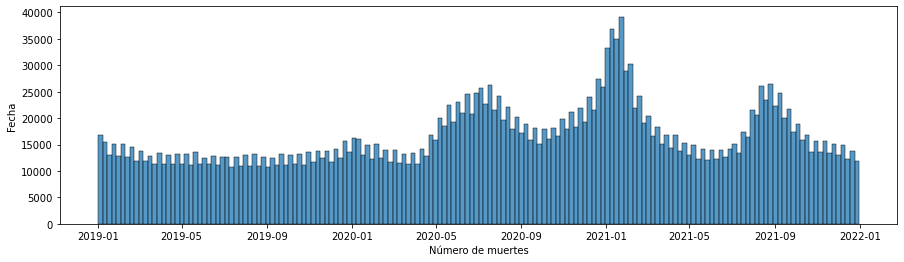

In [6]:
# podemos ver la distribución de las muertes (en todos los estados):
fig, axs = plt.subplots(figsize=(15, 4))
#plt.figure(figsize=(12,5))
sns.histplot(muertesDf.date)
plt.ylabel("Fecha")
plt.xlabel("Número de muertes")

In [7]:
# trabajaremos con los 5 estados con más muertes por enfermedades respiratorias

In [8]:
# vamos a obtener una tabla con las diferentes causasa de muerte y su código y también el número
# de casos de cada categoría
causasMuerte = muertesDf.groupby(['gr_lismex_name','gr_lismex']).size().sort_values(ascending=False).reset_index().rename(columns={0:'count'})
causasMuerte.head()

# los datos muestran que las enfermedades víricas son las causas más cómunes. también vemos que las causas
# no naturales tienen una letra E al inicio del código

,gr_lismex_name,gr_lismex,count
0,Enfermedades víricas,6,436340
1,Enfermedades isquémicas del corazón,28,431251
2,Enfermedades endocrinas y metabólicas,20,407892
3,Otras enfermedades del aparato respiratorio,33,240501
4,Enfermedades de otras partes del aparato diges...,35,205535


In [9]:
# por did[actica, veamos sólo esas causas no naturales:
causasMuerte[causasMuerte.gr_lismex.str[0]=='E'].sort_values(by='count', ascending=False)

,gr_lismex_name,gr_lismex,count
6,Agresiones,E55,89457
12,Accidentes de transporte,E49,38610
13,"Otros accidentes, incluso los efectos tardíos",E51,38247
23,Lesiones autoinfligidas intencionalmente,E54,20016
29,Otra violencia,E56,14244
34,Caídas,E50,5508
37,"Envenenamiento accidental por, y exposición a ...",E53,3265
42,"Exposición al humo, fuego y llamas",E52,1600
45,"Contratiempos durante la atención medica, reac...",E58,735
47,"Drogas, medicamentos y sustancias biológicas c...",E57,488


In [10]:
# las causas de muerte que nos interesan son las relacionadas al sistema respiratorio. intentemos filtrarlas:
causasMuerte['gr_lismex_name_lower'] = causasMuerte['gr_lismex_name'].str.lower()
causasMuerte[causasMuerte.gr_lismex_name_lower.str.contains('resp|tuber|pulm')]

,gr_lismex_name,gr_lismex,count,gr_lismex_name_lower
3,Otras enfermedades del aparato respiratorio,33,240501,otras enfermedades del aparato respiratorio
11,Enfermedades de la circulación pulmonar y otra...,29,47564,enfermedades de la circulación pulmonar y otra...
20,Tumor maligno de órganos respiratorios e intra...,10,22516,tumor maligno de órganos respiratorios e intra...
33,Tuberculosis,2,6253,tuberculosis
46,Infecciones y otras enfermedades de las vías r...,32,724,infecciones y otras enfermedades de las vías r...


In [11]:
muertesDf['gr_lismex_name_lower'] = muertesDf['gr_lismex_name'].str.lower()
muertesDf['eq6_respiratoria'] = False
muertesDf.loc[muertesDf.gr_lismex_name_lower.str.contains('resp|tuber|pulm'), 'eq6_respiratoria'] = True

Ahora prepararemos los datos de estados y municipio que usaremos para completar la tabla de muertesDf y otras tablas más adelante

## Mapeo de entidades y municipios
El dataset de muertes incluye datos de la entidad donde ocurrió la muerte pero sólo codificados con enteros en el rango 1-32. Igualmente para municipios con un rango de 1-570.

En la siguiente URL parece que está la información que requerim os para tener los nombre de la entidad y municipio
https://www.gob.mx/cms/uploads/attachment/file/58177/Municipios_Fommur_5298b1898b.pdf 

También encontramos este recurso:
- Catálogo Único de Claves de Áreas Geoestadísticas Estatales, Municipales y Localidades
- https://www.inegi.org.mx/app/ageeml/#


In [12]:
## Lectura de datos del "Catálogo Único de Claves de Áreas Geoestadísticas Estatales, Municipales y Localidades"
# de inegi https://www.inegi.org.mx/app/ageeml/#
geoDf = pd.read_csv("./data/geo/AGEEML_2023318115324.csv")
## Impresion de dimensiones
print(geoDf.shape)
geoDf.info()

(300128, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300128 entries, 0 to 300127
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   MAPA                          300128 non-null  int64  
 1   Estatus                       0 non-null       float64
 2   CVE_ENT                       300128 non-null  int64  
 3   NOM_ENT                       300128 non-null  object 
 4   NOM_ABR                       300128 non-null  object 
 5   CVE_MUN                       300128 non-null  int64  
 6   NOM_MUN                       300128 non-null  object 
 7   CVE_LOC                       300128 non-null  int64  
 8   NOM_LOC                       300128 non-null  object 
 9   AMBITO                        300128 non-null  object 
 10  LATITUD                       300128 non-null  object 
 11  LONGITUD                      300128 non-null  object 
 12  LAT_DECIMAL                   3

In [13]:
# vamos a hacer una columna con nombre abreviado pero que sea de maximo 3 caracteres, sin puntos y en mayuscula:
geoDf['estado'] = geoDf.NOM_ABR.str.replace('.','').str.lower().str.replace(' ','').apply(lambda x : x[:4])


/tmp/ipykernel_663634/1591863810.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  geoDf['estado'] = geoDf.NOM_ABR.str.replace('.','').str.lower().str.replace(' ','').apply(lambda x : x[:4])


In [14]:
# vamos a obtener los valores únicos para las columnas CVE_ENT y NOM_ENT,
# así como el número de municipios de cada una
geoDf_estados = geoDf.groupby(['CVE_ENT','NOM_ENT','NOM_ABR','estado']).size().reset_index().rename(columns={0:'count'})
geoDf_estados.head()

,CVE_ENT,NOM_ENT,NOM_ABR,estado,count
0,1,Aguascalientes,Ags.,ags,2903
1,2,Baja California,BC,bc,7839
2,3,Baja California Sur,BCS,bcs,3919
3,4,Campeche,Camp.,camp,4990
4,5,Coahuila de Zaragoza,Coah.,coah,10511


### Continuamos ahora con la tabla de muertesDf y agregaremos el nombre de la entidad

In [15]:
muertesDf = pd.merge(left=muertesDf, right=geoDf_estados, how='inner', left_on='ent_ocurr', right_on='CVE_ENT')
muertesDf.drop('ent_ocurr', axis=1, inplace=True)

In [16]:
# ahora encontraremos los 5 estados con m[as muertes por casusas respiratorias
muertesDf[muertesDf.eq6_respiratoria==True].groupby('NOM_ENT').size().sort_values(ascending=False).head(5)

NOM_ENT
Ciudad de México                   35392
México                             32852
Jalisco                            25510
Veracruz de Ignacio de la Llave    19822
Puebla                             17185
dtype: int64

In [17]:
muertesDfTop = muertesDf[muertesDf.NOM_ENT.str.contains('Ciudad de México|México|Jalisco|Veracruz|Puebla')==True]
muertesDfTop = muertesDfTop[muertesDfTop.eq6_respiratoria==True]
muertesDfTop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130761 entries, 24981 to 2170401
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            130761 non-null  int64         
 1   date                  130761 non-null  datetime64[ns]
 2   tod                   130761 non-null  object        
 3   tod_float             130761 non-null  int64         
 4   tod_norm              130761 non-null  float64       
 5   gr_lismex             130761 non-null  object        
 6   gr_lismex_name        130761 non-null  object        
 7   mes_ocurr             130761 non-null  int64         
 8   causa_def             130761 non-null  object        
 9   gr_lismex_name_lower  130761 non-null  object        
 10  eq6_respiratoria      130761 non-null  bool          
 11  CVE_ENT               130761 non-null  int64         
 12  NOM_ENT               130761 non-null  object        

In [18]:
muertesDfTop = muertesDfTop.drop(['Unnamed: 0','tod','tod_float','tod_norm','mes_ocurr'], axis=1)

In [19]:
muertesDfTop.iloc[16]

date                                            2020-01-07 00:00:00
gr_lismex                                                        33
gr_lismex_name          Otras enfermedades del aparato respiratorio
causa_def                                                      J440
gr_lismex_name_lower    otras enfermedades del aparato respiratorio
eq6_respiratoria                                               True
CVE_ENT                                                          14
NOM_ENT                                                     Jalisco
NOM_ABR                                                        Jal.
estado                                                          jal
count                                                         19469
Name: 25605, dtype: object

## Datos de contaminación en México

Fuente:
- https://www.kaggle.com/datasets/elianaj/mexico-air-quality-dataset?select=stations_daily.csv

In [20]:
## Lectura de datos
# este dataset contiene las mediciones promedio por día de cada una de las estaciones
aire_diario = pd.read_csv("./data/air_mexico/stations_daily.csv")

In [21]:
aire_diario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231592 entries, 0 to 231591
Data columns (total 27 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   datetime    231592 non-null  object 
 1   station_id  231592 non-null  int64  
 2   PM2.5       161698 non-null  float64
 3   PM10        180481 non-null  float64
 4   NOx         112881 non-null  float64
 5   O3          192957 non-null  float64
 6   CO          175493 non-null  float64
 7   HR          123285 non-null  float64
 8   NO          118154 non-null  float64
 9   NO2         169286 non-null  float64
 10  TMP         127015 non-null  float64
 11  BEN         775 non-null     float64
 12  CH4         270 non-null     float64
 13  CN          595 non-null     float64
 14  CO2         56 non-null      float64
 15  H2S         280 non-null     float64
 16  HCNM        279 non-null     float64
 17  HCT         0 non-null       float64
 18  HRI         10205 non-null   float64
 19  IU

In [22]:
# este dataset contiene información de las estaciones
aire_estaciones = pd.read_csv("./data/air_mexico/stations_rsinaica.csv")
print('aire_estaciones.shape():',aire_estaciones.shape)
aire_estaciones.info()

aire_estaciones.shape(): (341, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_id         341 non-null    int64  
 1   station_name       341 non-null    object 
 2   station_code       341 non-null    object 
 3   network_id         341 non-null    int64  
 4   network_name       334 non-null    object 
 5   network_code       340 non-null    object 
 6   street             187 non-null    object 
 7   ext                154 non-null    object 
 8   interior           74 non-null     object 
 9   colonia            186 non-null    object 
 10  zip                143 non-null    object 
 11  state_code         299 non-null    float64
 12  municipio_code     299 non-null    float64
 13  year_started       138 non-null    float64
 14  altitude           320 non-null    float64
 15  address            138 non-null    obje

In [23]:
# sin embargo este dataset no tiene la información completa del estado o municipio
# donde se encuentra la cada estación. sólo tenemos información de a qué
# red pertence con network_name	 (v.gr Aguascalientes, Centro, Valle de México)
# 
# muchas columnas tienem datos incompletos:
aire_estaciones.isna().sum(axis=0).to_frame()

,0
station_id,0
station_name,0
station_code,0
network_id,0
network_name,7
network_code,1
street,154
ext,187
interior,267
colonia,155


In [24]:
# a nosotros nos interesa saber en qué estado o municipio se encuentra cada estación.
#
# sólo 25 estaciones no tienen latitud y longitud (que se encuentran en decimales). trataremos de obtener la información
# de estado o municipio a partir de sus coordenadas de ubiacación y los datos que tenemos de INEGI de
# Áreas Geoestadísticas Estatales, Municipales y Localidades ya que esos datos cuentan con tienen coordenas geográficas

# podemos iterar las estaciones y calcular qué municipio es el más cercano:

aire_estaciones['eq6_ent_cve'] = None
aire_estaciones['eq6_ent_nom'] = None
aire_estaciones['eq6_mun_cve'] = None
aire_estaciones['eq6_mun_nom'] = None
aire_estaciones['estado'] = None
import numpy as np
for index,station in aire_estaciones.iterrows():
    #print(station.lat,station.lon)
    #print(station['lat'])
    
    station_coords = [float(station['lat']),float(station['lon'])]
    if pd.isna(station_coords[0]) or  pd.isna(station_coords[1]):
        pass
        #aire_estaciones.iloc[index].eq6_municipio = None
    else:
        # usamos distasncia euclidiana para mapear a la ubicacion geoestadística más cercana
        min_dist_index = (geoDf[['LAT_DECIMAL','LON_DECIMAL']] - np.array(station_coords)).pow(2).sum(1).pow(0.5).argmin()
        if False:
            print()
            print(station.station_name, station.network_name)
            print(station_coords, geoDf.iloc[min_dist_index][['LAT_DECIMAL','LON_DECIMAL']].to_numpy())
            print(geoDf.iloc[min_dist_index][['NOM_ENT','NOM_MUN']].to_numpy())
        aire_estaciones.loc[index,'eq6_ent_cve'] = geoDf.iloc[min_dist_index].CVE_ENT
        aire_estaciones.loc[index,'eq6_ent_nom'] = geoDf.iloc[min_dist_index].NOM_ENT
        aire_estaciones.loc[index,'eq6_mun_cve'] = geoDf.iloc[min_dist_index].CVE_MUN
        aire_estaciones.loc[index,'eq6_mun_nom'] = geoDf.iloc[min_dist_index].NOM_MUN
        aire_estaciones.loc[index,'estado'] = geoDf.iloc[min_dist_index].estado



In [25]:
aire_estaciones.iloc[21]

station_id                                                  223
station_name                                            Apizaco
station_code                                                APZ
network_id                                                  110
network_name                                            Apizaco
network_code                                                APZ
street                                            Independencia
ext                                                        1301
interior                                                    NaN
colonia                                                     NaN
zip                                                         NaN
state_code                                                 29.0
municipio_code                                           2027.0
year_started                                             1996.0
altitude                                                    0.0
address               Independencia 1301

In [26]:
# número de estaciones que hay por estado
aire_estaciones.groupby(['eq6_ent_nom','eq6_ent_cve']).size()

eq6_ent_nom                      eq6_ent_cve
Aguascalientes                   1               6
Baja California                  2              19
Campeche                         4               1
Chiapas                          7               3
Chihuahua                        8              17
Ciudad de México                 9              32
Coahuila de Zaragoza             5               9
Colima                           6               1
Durango                          10             11
Guanajuato                       11             27
Guerrero                         12              1
Hidalgo                          13             24
Jalisco                          14             10
Michoacán de Ocampo              16              4
Morelos                          17              4
México                           15             44
Nayarit                          18              3
Nuevo León                       19             13
Oaxaca                           20  

In [27]:
# las 32 estaciones en CDMX:
aire_estaciones[aire_estaciones.eq6_ent_cve==9][['station_name','lat','lon']]

,station_name,lat,lon
276,Ajusco Medio,19.272222,-99.207778
277,Ajusco,19.154286,-99.162778
280,Azcapotzalco,19.489389,-99.198972
281,Benito Juárez,19.371667,-99.159167
282,Camarones,19.468611,-99.170000
283,Centro de Ciencias de la Atmósfera,19.326389,-99.176111
284,Cerro de la estrella,19.336556,-99.075111
286,Coyoacán,19.350278,-99.157222
287,Cuajimalpa,19.365556,-99.291944
288,Cuitláhuac,19.471744,-99.165840


In [28]:
# ahora tenemos la tabla de estaciones con los datos completos que necesitaremos y podemos hacer merge
# con la tabla de medidas diarias de condiciones del aire.
# la tabla nueva contendrá la infomrmación del estado donde se tomó la medición
aire_diario_full = pd.merge(aire_diario, aire_estaciones, how='left', on='station_id')
aire_diario_full.head()

,datetime,station_id,PM2.5,PM10,NOx,O3,CO,HR,NO,NO2,...,date_started,timezone,street_view,video_interior,color,eq6_ent_cve,eq6_ent_nom,eq6_mun_cve,eq6_mun_nom,estado
0,2015-04-02,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2015-01-16,"Tiempo del centro, UTC-6 (UTC-5 en verano)","https://www.google.com.mx/maps/@21.845408,-102...",https://www.youtube.com/embed/wE0AYV2dHWo,Others,1,Aguascalientes,1,Aguascalientes,ags
1,2015-05-21,32,0.454967,0.347400,0.059194,0.029176,NaN,44.879091,0.029525,0.053121,...,2015-01-16,"Tiempo del centro, UTC-6 (UTC-5 en verano)","https://www.google.com.mx/maps/@21.845408,-102...",https://www.youtube.com/embed/wE0AYV2dHWo,Others,1,Aguascalientes,1,Aguascalientes,ags
2,2015-05-22,32,0.077821,0.389323,0.019158,0.051903,NaN,42.506000,0.009589,0.014215,...,2015-01-16,"Tiempo del centro, UTC-6 (UTC-5 en verano)","https://www.google.com.mx/maps/@21.845408,-102...",https://www.youtube.com/embed/wE0AYV2dHWo,Others,1,Aguascalientes,1,Aguascalientes,ags
3,2015-05-23,32,0.018036,0.387729,0.019711,0.021092,0.144603,54.734437,0.009863,0.013436,...,2015-01-16,"Tiempo del centro, UTC-6 (UTC-5 en verano)","https://www.google.com.mx/maps/@21.845408,-102...",https://www.youtube.com/embed/wE0AYV2dHWo,Others,1,Aguascalientes,1,Aguascalientes,ags
4,2015-05-24,32,0.024935,0.398042,0.024757,0.009568,0.494143,58.374574,0.012397,0.010337,...,2015-01-16,"Tiempo del centro, UTC-6 (UTC-5 en verano)","https://www.google.com.mx/maps/@21.845408,-102...",https://www.youtube.com/embed/wE0AYV2dHWo,Others,1,Aguascalientes,1,Aguascalientes,ags


In [29]:

aire_diario_full.groupby('eq6_ent_nom')['PM10'].mean()
# esto nos da el promedio de todas las mediciones de todas las estaciones de un estado, pero tomando en cuenta todos los d[ias

eq6_ent_nom
Aguascalientes                     8.416085e+01
Chihuahua                          6.033643e+01
Ciudad de México                   4.304051e+01
Coahuila de Zaragoza               1.773833e+02
Durango                            5.177240e+34
Guanajuato                         5.754743e+01
Guerrero                           7.049345e-01
Hidalgo                            6.260858e+01
Jalisco                            4.646577e+01
Michoacán de Ocampo                5.055251e+01
Morelos                            6.174408e+01
México                             5.623721e+01
Nayarit                            5.047125e+01
Nuevo León                         6.507578e+01
Oaxaca                             3.901956e+01
Puebla                             4.605349e+01
Tlaxcala                           2.779932e+02
Veracruz de Ignacio de la Llave    1.526605e+02
Name: PM10, dtype: float64

In [30]:
# convirtamos en pandas datetime la columna de datetime:
aire_diario_full.datetime = pd.to_datetime(aire_diario_full.datetime)

In [31]:
# filtremos los datos de calidad del aire s[olo para tener los que caen en el rango de muertesDf:
aire_diario_full_en_rango = aire_diario_full[(aire_diario_full.datetime>muertes_inicio) & (aire_diario_full.datetime<muertes_fin)]
print(aire_diario_full.shape)
print(aire_diario_full_en_rango.shape)

(231592, 58)
(73988, 58)


In [32]:
# ahora filtemos por estados:
aire_diario_full_en_rango_top = aire_diario_full_en_rango.loc[aire_diario_full_en_rango.eq6_ent_nom.str.contains('Ciudad de México|México|Veracruz|Jalisco|Puebla')]
print(aire_diario_full_en_rango.shape)
print(aire_diario_full_en_rango_top.shape)

(73988, 58)
(26647, 58)


In [33]:
# vemos cuantas lecturas tiene cada estaci[on en los estados seleccionados
aire_diario_full_en_rango_top.groupby(['eq6_ent_nom','station_id']).size()

eq6_ent_nom                      station_id
Ciudad de México                 241            291
                                 242            545
                                 244            915
                                 245           1055
                                 251            544
                                 256           1071
                                 262            986
                                 263           1050
                                 268            964
                                 269           1047
                                 302           1008
Jalisco                          102           1003
                                 103           1070
                                 106           1060
                                 109           1090
México                           123           1094
                                 125           1094
                                 126           1077
                    

<AxesSubplot: xlabel='PM10', ylabel='Fecha'>

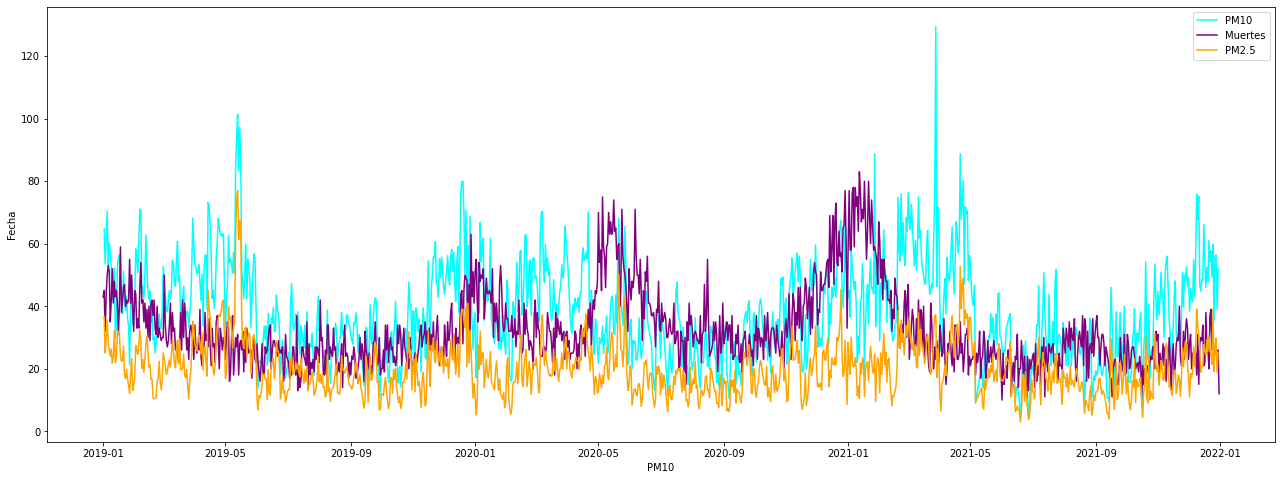

In [34]:
# extraemos todas las lecturas para CDMX, de todas las estaciones por d[ia y las promediamos:
dataPM10 = aire_diario_full_en_rango_top[aire_diario_full_en_rango_top.eq6_ent_nom=='Ciudad de México'].groupby('datetime')['PM10'].mean().to_frame()

dataPM25 = aire_diario_full_en_rango_top[aire_diario_full_en_rango_top.eq6_ent_nom=='Ciudad de México'].groupby('datetime')['PM2.5'].mean().to_frame()

# para las muertes es diferente porque aqu[i cada fila es una muerte y hay que sumarlas en vez de promediarlas:
dataMuertes = muertesDfTop[muertesDfTop.NOM_ENT=='Ciudad de México'].groupby('date').size().to_frame().rename(columns={0:'Muertes'})

fig, axs = plt.subplots(figsize=(22, 8))
plt.ylabel("Fecha")
plt.xlabel("PM10")
sns.lineplot(data=dataPM10, palette=['cyan'])
sns.lineplot(data=dataMuertes, palette=['purple'])
sns.lineplot(data=dataPM25, palette=['orange'])

In [54]:
# el proceso siguiente tratar[a de hacer una tabla que consolide la informaci[on que necesitamos para el resto de nuestro analisis
# realizamos un merge proceduralmente para los estados que decidimos analizar:

myc_consolidado_index = pd.date_range(muertes_inicio,muertes_fin,freq='D')
myc_consolidado = pd.DataFrame(index=dyc_consolidado_index)
for estado in ['cdmx','mex','pue', 'jal', 'ver']:
    # promedio diario de todas las estaciones de un estado:
    dataPM10 = aire_diario_full_en_rango_top[aire_diario_full_en_rango_top.estado==estado].groupby('datetime')['PM10'].mean().to_frame()
    dataPM25 = aire_diario_full_en_rango_top[aire_diario_full_en_rango_top.estado==estado].groupby('datetime')['PM2.5'].mean().to_frame()
    # para las muertes es diferente porque aqu[i cada fila es una muerte y hay que sumarlas en vez de promediarlas:
    dataMuertes = muertesDfTop[muertesDfTop.estado==estado].groupby('date').size().to_frame().rename(columns={0:'Muertes'})
    # hacemos merge usando la fecha como llave:
    dyc_consolidado = pd.merge(myc_consolidado,dataMuertes,left_index=True, right_index=True)
    dyc_consolidado = pd.merge(myc_consolidado,dataPM10,left_index=True, right_index=True)
    dyc_consolidado = pd.merge(myc_consolidado,dataPM25,left_index=True, right_index=True)
    dyc_consolidado.rename(columns={'Muertes':'muertes_'+estado,'PM10':'pm10_'+estado,'PM2.5':'pm2.5_'+estado},inplace=True)


In [ ]:
fig, axs = plt.subplots(figsize=(22, 8))
plt.ylabel("Fecha")
plt.xlabel("Muertes por Estado")
sns.lineplot(data=myc, palette=['cyan'])
#sns.lineplot(data=dataMuertes, palette=['purple'])
#sns.lineplot(data=dataPM25, palette=['orange'])